In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv("database.csv")

C:\Users\dan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
str ="Dataset info :\nThe Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used."
print("\033[1;31;20m \n{}".format(str))
print("\033[0;30;48m   ")

 
Dataset info :
The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.
   


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [3]:
#rename colums titles to lower with no spaces
data = data.rename(index=int, columns=dict(zip(list(data), [(lambda x: x.lower().replace(' ','_') )(x) for x in list(data)])))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638454 entries, 0 to 638453
Data columns (total 24 columns):
record_id                638454 non-null int64
agency_code              638454 non-null object
agency_name              638454 non-null object
agency_type              638454 non-null object
city                     638454 non-null object
state                    638454 non-null object
year                     638454 non-null int64
month                    638454 non-null object
incident                 638454 non-null int64
crime_type               638454 non-null object
crime_solved             638454 non-null object
victim_sex               638454 non-null object
victim_age               638454 non-null int64
victim_race              638454 non-null object
victim_ethnicity         638454 non-null object
perpetrator_sex          638454 non-null object
perpetrator_age          638454 non-null object
perpetrator_race         638454 non-null object
perpetrator_ethnicity    6384

In [28]:
uni = dict(zip(list(data), [(lambda x: len(data[x].unique()) )(x) for x in list(data)]))
print(uni)

{'record_id': 638454, 'agency_code': 12003, 'agency_name': 9216, 'agency_type': 7, 'city': 1782, 'state': 51, 'year': 35, 'month': 12, 'incident': 1000, 'crime_type': 2, 'crime_solved': 2, 'victim_sex': 3, 'victim_age': 101, 'victim_race': 5, 'victim_ethnicity': 3, 'perpetrator_sex': 3, 'perpetrator_age': 191, 'perpetrator_race': 5, 'perpetrator_ethnicity': 3, 'relationship': 28, 'weapon': 16, 'victim_count': 11, 'perpetrator_count': 11, 'record_source': 2}


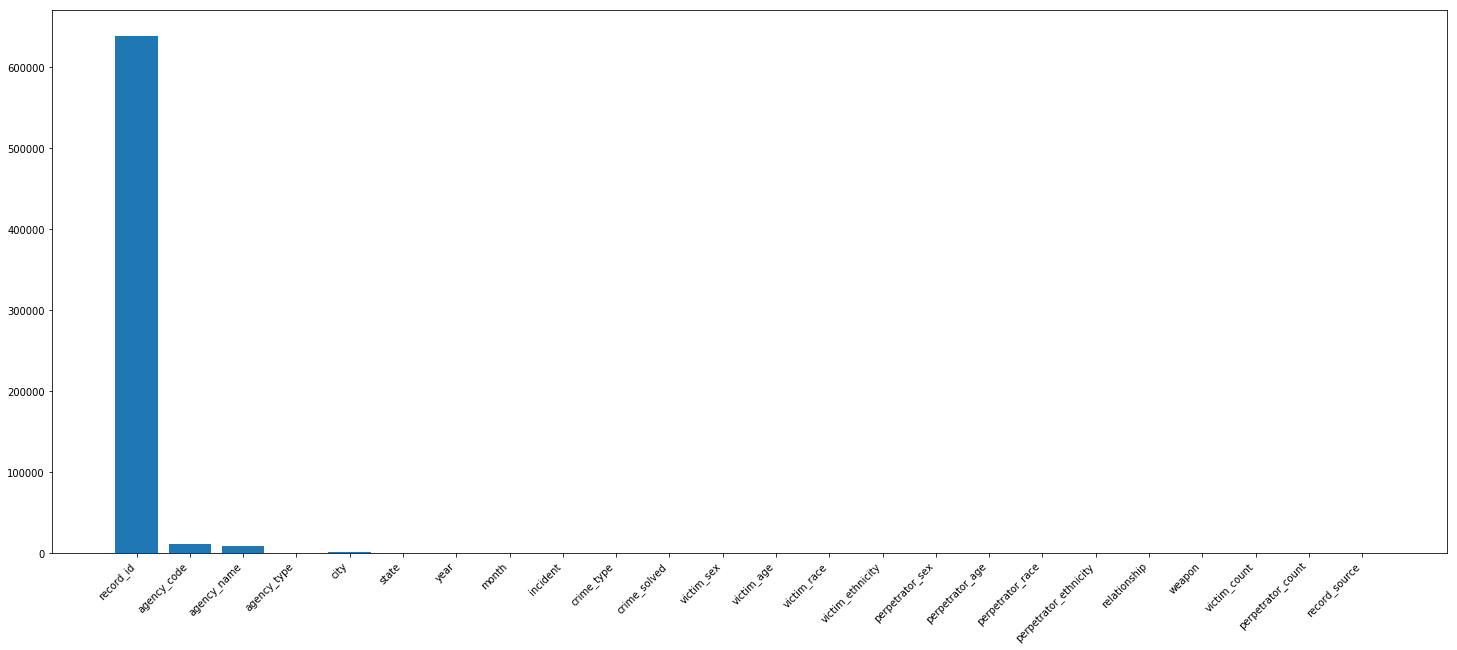

In [29]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(25, 10))
plt.bar(range(len(uni)), uni.values(), align='center')
plt.xticks(range(len(uni)), list(uni.keys()),rotation=45, ha='right')
plt.show()

In [4]:
#drooping columns with uniqe values
data = data.drop(['record_id'],axis=1)
data.dropna()


,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,crime_solved,...,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,Yes,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,Yes,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [31]:
uni = dict(zip(list(data), [(lambda x: len(data[x].unique()) )(x) for x in list(data)]))
print(uni)

{'agency_code': 12003, 'agency_name': 9216, 'agency_type': 7, 'city': 1782, 'state': 51, 'year': 35, 'month': 12, 'incident': 1000, 'crime_type': 2, 'crime_solved': 2, 'victim_sex': 3, 'victim_age': 101, 'victim_race': 5, 'victim_ethnicity': 3, 'perpetrator_sex': 3, 'perpetrator_age': 191, 'perpetrator_race': 5, 'perpetrator_ethnicity': 3, 'relationship': 28, 'weapon': 16, 'victim_count': 11, 'perpetrator_count': 11, 'record_source': 2}


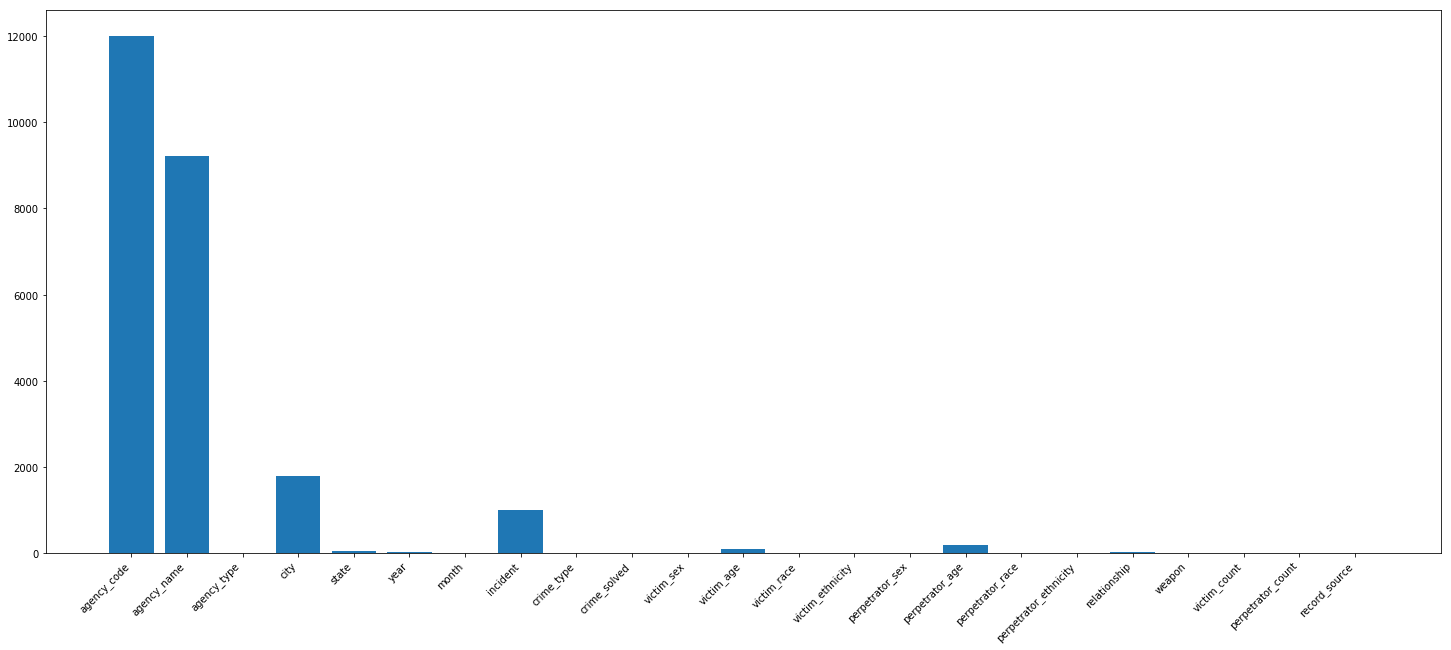

In [32]:
fig = plt.figure(figsize=(25, 10))
plt.bar(range(len(uni)), uni.values(), align='center')
plt.xticks(range(len(uni)), list(uni.keys()),rotation=45, ha='right')
plt.show()

In [ ]:
#filtering out column 'agency_code' due to high amount of categories,removing rows with less then 10 apperances for the given agency code

data['count_agency_code'] = data.groupby('agency_code')['agency_code'].transform(pd.Series.value_counts)
data = data[ data['count_agency_code'] > 100  ]
data = data.drop(['count_agency_code'],axis=1)

#  fixing the problematic columns with for loop :

# column_list = ['agency_code','agency_name','city','incident']
# for i in column_list:
#     data['temp'] = data.groupby(i)[i].transform(pd.Series.value_counts)
#     data = data[ data['temp'] > 100  ]
#     data = data.drop(['temp'],axis=1)

In [315]:
# correlation test is not relevant because most of the columns are catgorical
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,incident,victim_age,victim_count,perpetrator_count
year,1,0.123837,-0.00484268,0.0209852,0.0498274
incident,0.123837,1,-0.00410244,0.00653858,0.00097522
victim_age,-0.00484268,-0.00410244,1,-0.0072314,-0.0197439
victim_count,0.0209852,0.00653858,-0.0072314,1,0.0779754
perpetrator_count,0.0498274,0.00097522,-0.0197439,0.0779754,1


In [35]:
print("\033[1;31;20m \n       Top 3 frequent categories in dataset for each column by freq percantage:  ")
print("\033[0;30;48m   ")
for i in data.columns:
    print("{}unique values:{}\n".format( round((data.groupby([i]).size()/len(data)*100),2).sort_values(ascending=False).head(3),len(data[i].value_counts())).replace('dtype: float64','').replace("i\n","\n"))

 
       Top 3 frequent categories in dataset for each column by freq percantage:  
   
agency_code
NY03030    6.02
CA01942    3.71
ILCPD00    3.34
unique values:12003

agency_name
New York       6.02
Los Angeles    4.54
Chicago        3.34
unique values:9216

agency_type
Municipal Police    77.22
Sheriff             16.50
County Police        3.55
unique values:7

city
Los Angeles    6.97
New York       6.02
Cook           3.51
unique values:1782

state
California    15.63
Texas          9.73
New York       7.72
unique values:51

year
1993    3.81
1992    3.73
1994    3.64
unique values:35

month
July        9.19
August      9.10
December    8.64
unique values:12

incident
1    41.59
2    11.24
3     6.15
unique values:1000

crime_type
Murder or Manslaughter        98.57
Manslaughter by Negligence     1.43
unique values:2

crime_solved
Yes    70.2
No     29.8
unique values:2

victim_sex
Male       77.39
Female     22.45
Unknown     0.15
unique values:3

victim_age
20    3.61
22    3.6

In [5]:
# Adding 'month_int' column in addition to the existin string column
months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12 }
data['month_int'] = data['month'].map(months)

#Validating the month_int new column by simple group by
data[ (data['state'] == 'California') & (data['year'] == 1993 )].groupby(['month_int']).size()


month_int
1     327
2     305
3     357
4     335
5     368
6     410
7     414
8     388
9     360
10    391
11    357
12    357
dtype: int64

In [6]:
# categorizing numerical columns by groups of 10 years (ages (perpetrator & victim) and year (event year)) 
data['victim_age_group'] =  data['victim_age'].apply( lambda x: "{}-{}".format((int(x/10)*10),(int(x/10))*10+10) if ((str(x) != 0) & (str(x) != '')) else 'unknown' )
data['perpetrator_age_group'] =  data['perpetrator_age'].apply( lambda x: "{}-{}".format((int(x/10)*10),(int(x/10))*10+10) if ('int' in str(type(x))) & (str(x)!='0') else 'unknown')
data['year_group'] = data['year'].apply(lambda x : "{}-{}".format( (int(x) - int(int(x)%10)) , (int(x) + (10-int(int(x)%10))  ) ))

In [553]:
#Validating the perpetrator_age_group new column by simple group by
data[data['perpetrator_age_group'] == '0-10' ]

,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,crime_solved,...,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source,month_int,victim_age_group,perpetrator_age_group,year_group
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,0,FBI,3,30-40,0-10,1980-1990
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,1,FBI,4,30-40,0-10,1980-1990
8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,No,...,Unknown,Unknown,Firearm,0,0,FBI,6,30-40,0-10,1980-1990
10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,1,FBI,7,30-40,0-10,1980-1990
14,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,No,...,Unknown,Unknown,Handgun,0,0,FBI,8,40-50,0-10,1980-1990
26,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,February,1,Murder or Manslaughter,No,...,Unknown,Unknown,Handgun,0,0,FBI,2,20-30,0-10,1980-1990
31,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,June,1,Manslaughter by Negligence,Yes,...,Unknown,Sister,Rifle,0,0,FBI,6,0-10,0-10,1980-1990
32,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,1,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,0,FBI,7,20-30,0-10,1980-1990
33,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,2,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,0,FBI,7,20-30,0-10,1980-1990
34,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,July,3,Murder or Manslaughter,No,...,Unknown,Unknown,Firearm,0,0,FBI,7,30-40,0-10,1980-1990


In [549]:
data.head()

,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,crime_solved,...,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source,month_int,victim_age_group,perpetrator_age_group,year_group
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Acquaintance,Blunt Object,0,0,FBI,1,10-20,10-20,1980-1990
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Acquaintance,Strangulation,0,0,FBI,3,40-50,40-50,1980-1990
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,0,FBI,3,30-40,0-10,1980-1990
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,Unknown,Acquaintance,Strangulation,0,0,FBI,4,40-50,40-50,1980-1990
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,Unknown,0,1,FBI,4,30-40,0-10,1980-1990


 
       Perpetrator VS Victims Ages Graph  
   


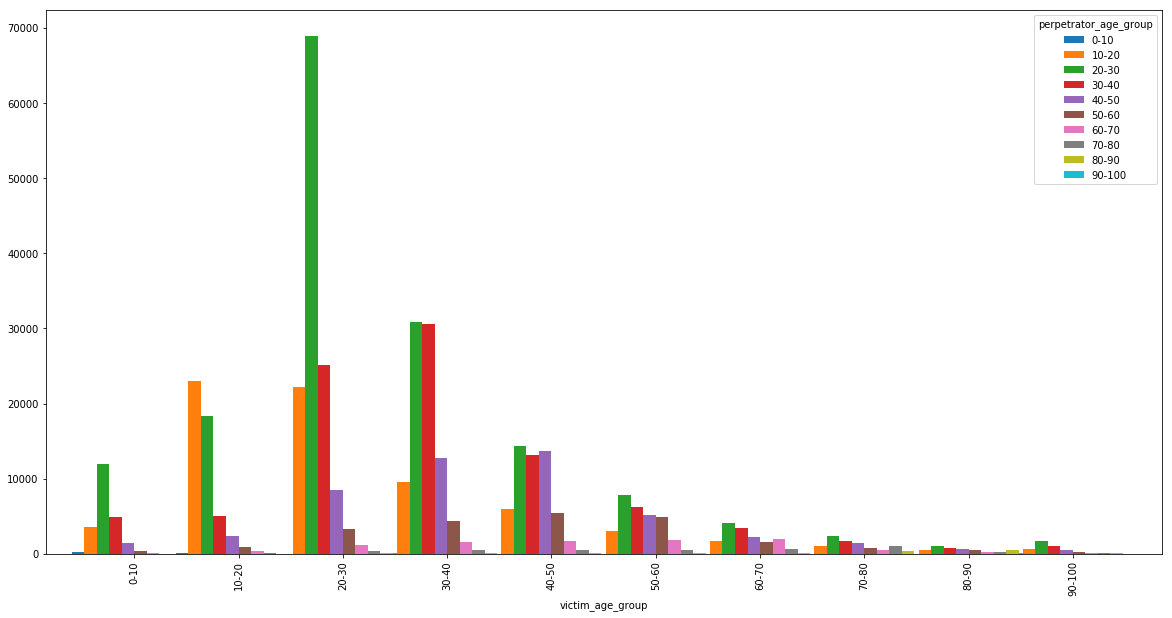

In [8]:
# perpetrator VS victims ages graph

data_age = data[(data['victim_age_group'] != '990-1000') & (data['perpetrator_age_group'] != 'unknown')  & (data['victim_age_group'] != 'unknown') ][['perpetrator_age','victim_age','victim_age_group','perpetrator_age_group']]
# data_age = data[  (data['victim_age_group'] != '990-1000') & (data['perpetrator_age_group'] != 'unknown')  & (data['victim_age_group'] != 'unknown') ]
data_age['temp']=1
print("\033[1;31;20m \n       Perpetrator VS Victims Ages Graph  ")
print("\033[0;30;48m   ")
pd.pivot_table(data_age, index=('victim_age_group'), columns=('perpetrator_age_group'),
               values='temp', aggfunc='count').plot(kind='bar',figsize=(20, 10),width =1.2)  


In [10]:
# Zooming in ages groups 10-20 & 20-30 which looks suspicious
young_ages_list = [10,11,12,13,14,15,16,17,18,19]
adult_ages_list = [20,21,22,23,24,25,26,27,28,29]
young_ages_data = data[  (data['perpetrator_age'].isin(young_ages_list)) & (data['victim_age'].isin(young_ages_list)) ][['victim_age','perpetrator_age']]
adult_ages_data = data[  (data['perpetrator_age'].isin(adult_ages_list)) & (data['victim_age'].isin(adult_ages_list)) ][['victim_age','perpetrator_age']]

In [12]:
young_ages_data['victim_age'] = young_ages_data['victim_age'].apply(lambda x: int(x))
young_ages_data['perpetrator_age'] = young_ages_data['perpetrator_age'].apply(lambda x: int(x))
young_ages_data['temp'] = 1
adult_ages_data['victim_age'] = adult_ages_data['victim_age'].apply(lambda x: int(x))
adult_ages_data['perpetrator_age'] = adult_ages_data['perpetrator_age'].apply(lambda x: int(x))
adult_ages_data['temp'] = 1

piv_young_ages_data = pd.pivot_table(young_ages_data, index=('perpetrator_age'), columns=('victim_age'),
               values='temp', aggfunc='count') 
piv_adult_ages_data = pd.pivot_table(adult_ages_data, index=('perpetrator_age'), columns=('victim_age'),
               values='temp', aggfunc='count') 

import ipywidgets as widgets
from IPython import display

def highlight_max(data, color='red'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)


print("\033[1;31;20m \n       Pivot table for ages 10-19 (count):  ")
print("\033[0;30;48m   ")
df1 = piv_young_ages_data
df1.style.apply(highlight_max)

 
       Pivot table for ages 10-19 (count):  
   


victim_age,10,11,12,13,14,15,16,17,18,19
perpetrator_age,,,,,,,,,,
10,11,7,10,7,2,4,nan,1,2,3
11,14,23,15,17,16,6,8,3,2,1
12,27,33,46,42,27,16,10,12,4,6
13,27,27,53,120,85,66,59,45,24,25
14,26,40,74,122,207,199,162,129,96,83
15,29,36,65,133,254,418,416,353,309,258
16,15,33,63,110,235,449,744,703,631,602
17,16,25,56,103,220,450,740,1186,1043,911
18,9,15,37,77,200,448,716,1098,1576,1323


In [13]:
print("\033[1;31;20m \n       Pivot table for ages 20-29 (count):  ")
print("\033[0;30;48m   ")
df2 = piv_adult_ages_data
df2.style.apply(highlight_max)

 
       Pivot table for ages 20-29 (count):  
   


victim_age,20,21,22,23,24,25,26,27,28,29
perpetrator_age,,,,,,,,,,
20,1629,1225,1161,944,847,807,657,545,539,457
21,1097,1314,1029,952,761,730,629,544,497,465
22,967,983,1239,885,775,775,696,591,507,473
23,760,893,982,1139,874,778,638,604,513,502
24,609,787,767,849,1072,807,705,639,520,501
25,604,701,775,827,804,1093,755,672,645,572
26,453,542,587,643,648,742,817,664,549,531
27,398,441,520,547,569,700,652,769,526,533
28,354,388,468,514,571,600,545,580,758,536


 
       Weapons Count  
   


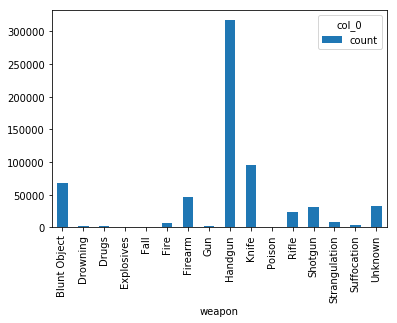

In [16]:
print("\033[1;31;20m \n       Weapons Count  ")
print("\033[0;30;48m   ")
my_tab = pd.crosstab(index = data["weapon"],columns="count")      
my_tab.plot.bar()

 
       Weapons Per State Heat Map  


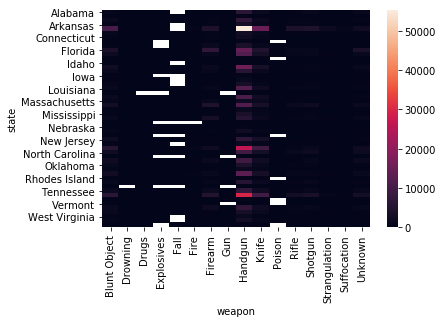

In [18]:
print("\033[1;31;20m \n       Weapons Per State Heat Map  ")
df_heatmap = pd.pivot_table(data, index=('state'), columns=('weapon'),values='incident', aggfunc='count')   # index - rows , columns - columns 
sns.heatmap(df_heatmap,annot=False) 
plt.show()

In [683]:
# https://www.usclimatedata.com/climate/alaska/united-states/3171# 
# climate date

url ="https://www.usclimatedata.com"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
states_dict = {}
for i in soup.find_all('a', class_='province'):
    states_dict[i.get('title').replace('Climate ','')] = 'https://www.usclimatedata.com'+i.get('href')
    print(i.get('title').replace('Climate ','')+' : '+'https://www.usclimatedata.com'+i.get('href'))

month_list  = []

months = soup.find_all('th', class_='climate_table_data_td')
for p in months:
    month_list.append(p.text)
month_dem = pd.DataFrame(pd.Series(month_list),columns=['month_str'])
month_dem['month_int'] = [1,2,3,4,5,6,7,8,9,10,11,12]

for i in states_dict:
    monthly_avg_temp_f_list = []
    url = states_dict[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    monthly_avg_temp_f = soup.find_all('td', class_='align_right temperature_red')
    for p in monthly_avg_temp_f:
        monthly_avg_temp_f_list.append(round((int(p.text) -32) * (5/9),3) )
    month_dem[i] = pd.Series(monthly_avg_temp_f_list)





Alabama : https://www.usclimatedata.com/climate/alabama/united-states/3170
Kentucky : https://www.usclimatedata.com/climate/kentucky/united-states/3187
North Dakota : https://www.usclimatedata.com/climate/north-dakota/united-states/3204
Alaska : https://www.usclimatedata.com/climate/alaska/united-states/3171
Louisiana : https://www.usclimatedata.com/climate/louisiana/united-states/3188
Ohio : https://www.usclimatedata.com/climate/ohio/united-states/3205
Arizona : https://www.usclimatedata.com/climate/arizona/united-states/3172
Maine : https://www.usclimatedata.com/climate/maine/united-states/3189
Oklahoma : https://www.usclimatedata.com/climate/oklahoma/united-states/3206
Arkansas : https://www.usclimatedata.com/climate/arkansas/united-states/3173
Maryland : https://www.usclimatedata.com/climate/maryland/united-states/1872
Oregon : https://www.usclimatedata.com/climate/oregon/united-states/3207
California : https://www.usclimatedata.com/climate/california/united-states/3174
Massachuset

In [684]:
month_dem

,month_str,month_int,Alabama,Kentucky,North Dakota,Alaska,Louisiana,Ohio,Arizona,Maine,...,Washington,Indiana,New Mexico,West Virginia,Iowa,New York,Wisconsin,Kansas,North Carolina,Wyoming
0,Jan,1,13.889,4.444,-5.000,-5.000,16.667,2.222,19.444,-2.222,...,8.333,1.667,6.667,5.556,-0.556,3.889,-1.667,4.444,10.556,4.444
1,Feb,2,16.667,7.222,-2.222,-2.778,18.333,4.444,21.667,0.000,...,10.000,4.444,8.889,8.333,2.222,5.556,0.556,7.222,12.778,4.444
2,Mar,3,21.111,12.778,4.444,1.111,22.222,11.111,25.000,4.444,...,12.222,10.556,13.333,13.333,9.444,10.000,5.556,13.333,17.222,8.333
3,Apr,4,25.000,18.889,13.889,6.667,25.556,17.222,29.444,11.667,...,14.444,17.222,18.333,20.000,16.667,15.556,12.222,19.444,22.222,12.778
4,May,5,28.889,23.889,20.000,13.333,29.444,22.778,35.000,18.333,...,18.333,22.778,23.333,23.889,22.222,21.667,18.333,24.444,26.111,18.333
5,Jun,6,32.222,28.333,25.000,17.222,31.667,27.778,40.000,23.333,...,21.111,27.778,28.333,27.778,27.778,26.111,23.889,29.444,30.000,23.889
6,Jul,7,33.333,30.556,29.444,18.333,32.778,29.444,41.111,26.111,...,24.444,29.444,30.000,29.444,30.000,29.444,26.667,31.667,31.667,28.333
7,Aug,8,33.333,30.000,28.333,17.778,32.778,28.889,40.000,25.556,...,24.444,28.333,28.333,28.889,28.889,28.333,25.556,31.667,30.556,27.222
8,Sep,9,30.556,26.111,22.222,12.778,30.556,25.000,37.778,21.111,...,21.667,25.000,25.556,25.556,24.444,24.444,21.667,26.667,27.222,22.222
9,Oct,10,25.556,20.000,14.444,4.444,26.667,18.333,31.667,13.889,...,15.556,18.333,19.444,20.000,17.222,18.333,15.000,20.000,22.222,15.000


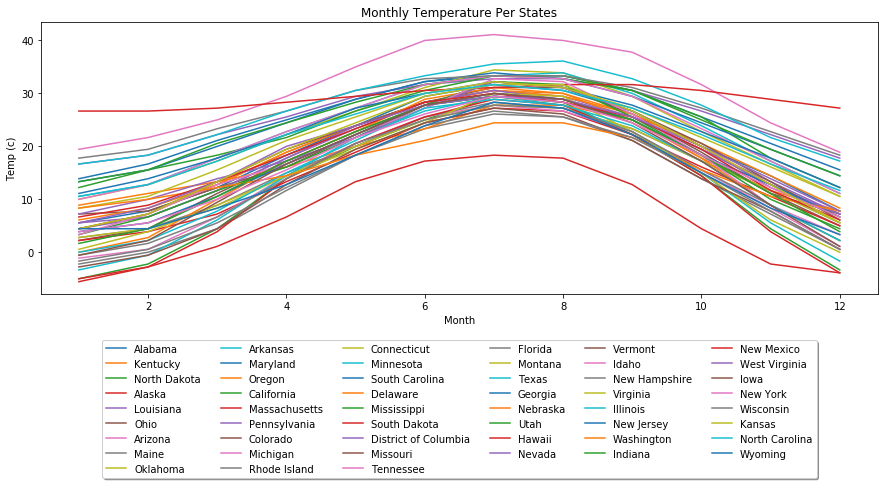

In [296]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

for i in month_dem.iloc[:, 2:]:
    month_dem.plot(kind='line',x='month_int',y=i ,ax=ax, figsize = (15,5))

plt.title("Monthly Temperature Per States")
plt.xlabel("Month")
plt.ylabel("Temp (c)");
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=6)
#ax.get_legend().remove()
plt.show()

 
         Alaska     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -5.000           115            -90.386618
1           2    -2.778           107            -50.218805
2           3     1.111           135             20.083907
3           4     6.667           103            120.521517
4           5    13.333           130            241.024956
5           6    17.222            97            311.327668
6           7    18.333           117            331.411574
7           8    17.778           134            321.378660
8           9    12.778           119            230.992041
9          10     4.444           115             80.335626
10         11    -2.222           119            -40.167813
11         12    -3.889           115            -70.302712


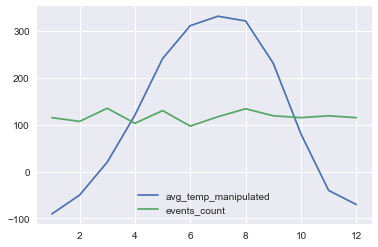

 
         Alabama     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    13.889           556            336.096684
1           2    16.667           515            403.320860
2           3    21.111           530            510.860184
3           4    25.000           560            604.969191
4           5    28.889           542            699.078199
5           6    32.222           589            779.732691
6           7    33.333           677            806.617522
7           8    33.333           626            806.617522
8           9    30.556           542            739.417544
9          10    25.556           545            618.423706
10         11    20.556           505            497.429868
11         12    15.556           992            376.436030


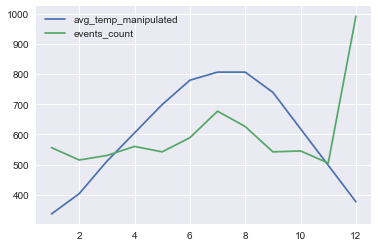

 
         Arkansas     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    10.556           292            127.964206
1           2    12.778           218            154.900210
2           3    17.778           256            215.512282
3           4    22.778           289            276.124354
4           5    27.222           301            329.996363
5           6    31.667           257            383.880495
6           7    33.333           324            404.076437
7           8    33.889           261            410.816500
8           9    30.000           263            363.672430
9          10    23.889           271            289.592356
10         11    17.222           275            208.772220
11         12    11.111           293            134.692146


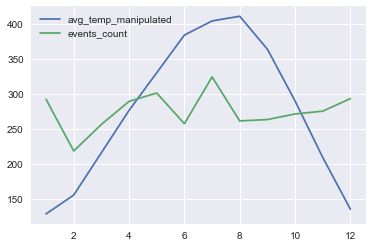

 
         Arizona     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    19.444           915            608.538662
1           2    21.667           819            678.111869
2           3    25.000          1009            782.424735
3           4    29.444           956            921.508555
4           5    35.000           948           1095.394629
5           6    40.000           948           1251.879575
6           7    41.111          1025           1286.650531
7           8    40.000          1006           1251.879575
8           9    37.778           931           1182.337665
9          10    31.667           997            991.081763
10         11    24.444           865            765.023609
11         12    18.889           987            591.168833


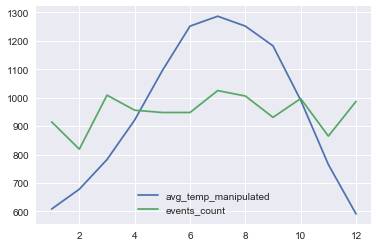

 
         California     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    12.222          7369           3905.499134
1           2    15.556          6351           4970.867659
2           3    18.333          7042           5858.248701
3           4    21.667          7026           6923.617227
4           5    26.667          7479           8521.350467
5           6    30.556          7330           9764.067382
6           7    33.333          8174          10651.448424
7           8    32.778          8245          10474.100035
8           9    30.556          7616           9764.067382
9          10    25.556          7581           8166.334141
10         11    17.778          6901           5680.900312
11         12    12.222          7472           3905.499134


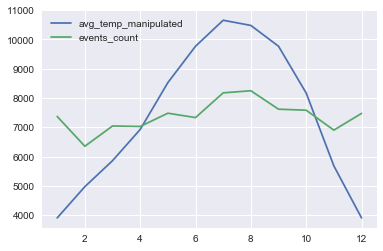

 
         Colorado     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     7.222           381            150.119801
1           2     7.778           339            161.677071
2           3    12.222           357            254.052091
3           4    16.111           372            334.890627
4           5    22.222           362            461.916672
5           6    27.778           384            577.406234
6           7    32.222           441            669.781254
7           8    31.111           407            646.687499
8           9    26.111           354            542.755208
9          10    18.889           360            392.635407
10         11    11.111           362            230.958336
11         12     7.222           454            150.119801


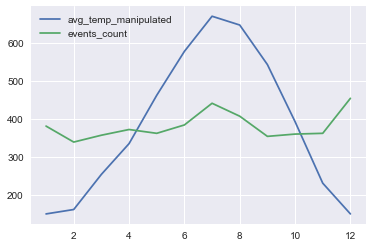

 
         Connecticut     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     2.778           305             54.738333
1           2     4.444           230             87.565570
2           3     8.333           266            164.195295
3           4    14.444           268            284.607806
4           5    20.000           283            394.084473
5           6    25.000           311            492.605591
6           7    27.778           388            547.343924
7           8    27.222           339            536.388376
8           9    23.333           336            459.758650
9          10    17.222           333            339.346139
10         11    11.667           299            229.889177
11         12     5.556           342            109.476666


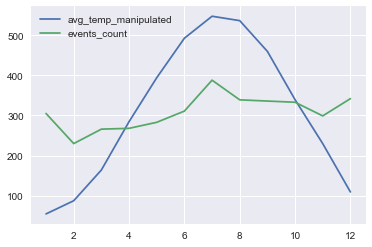

 
         District of Columbia     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     5.556           643            180.878228
1           2     6.667           516            217.047363
2           3    11.667           555            379.824746
3           4    17.778           498            578.771264
4           5    23.889           589            777.717782
5           6    28.333           573            922.394321
6           7    30.556           636            994.765145
7           8    28.889           655            940.495166
8           9    25.556           596            831.987762
9          10    19.444           668            633.008688
10         11    12.778           592            415.993881
11         12     7.222           587            235.115653


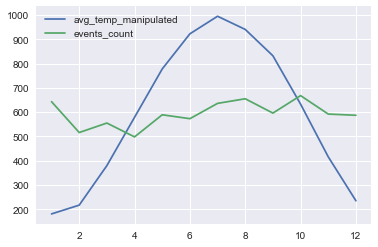

 
         Delaware     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     6.111            89             28.277631
1           2     8.333            86             38.559565
2           3    12.778            80             59.128059
3           4    18.889            86             87.405691
4           5    23.889            88            110.542355
5           6    28.333            96            131.106222
6           7    30.556            97            141.392783
7           8    29.444            96            136.247189
8           9    26.111            80            120.824289
9          10    20.556            89             95.119455
10         11    14.444            94             66.837196
11         12     8.333            73             38.559565


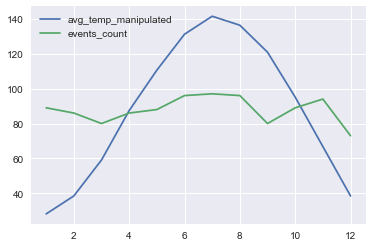

 
         Florida     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    17.778          2653           1757.836200
1           2    19.444          2373           1922.565365
2           3    23.333          2635           2307.098214
3           4    26.667          2535           2636.754299
4           5    30.556          2723           3021.287148
5           6    32.778          2594           3240.991954
6           7    33.333          2724           3295.868717
7           8    33.333          2660           3295.868717
8           9    31.111          2424           3076.163911
9          10    27.222          2575           2691.631062
10         11    22.778          2515           2252.221451
11         12    18.333          2900           1812.712963


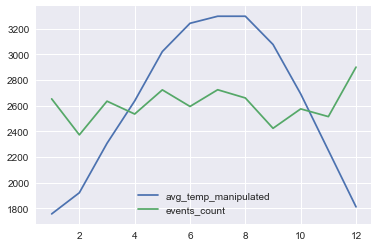

 
         Georgia     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    11.111          1243            612.269707
1           2    13.889          1010            765.350910
2           3    17.778          1123            979.653573
3           4    22.222          1235           1224.539414
4           5    27.222          1227           1500.063537
5           6    30.000          1204           1653.144740
6           7    32.222          1350           1775.587661
7           8    31.111          1353           1714.366201
8           9    27.778          1256           1530.701820
9          10    22.778          1256           1255.177697
10         11    17.778          1136            979.653573
11         12    12.222          1271            673.491167


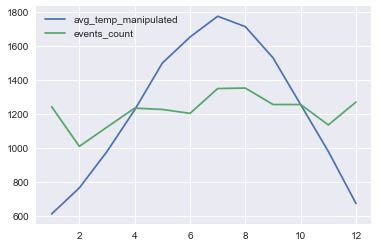

 
         Hawaii     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    26.667            94             87.162745
1           2    26.667            84             87.162745
2           3    27.222            94             88.976797
3           4    28.333           108             92.608170
4           5    29.444           106             96.239542
5           6    30.556            98             99.874183
6           7    31.111           102            101.688235
7           8    31.667           100            103.505556
8           9    31.667            91            103.505556
9          10    30.556            94             99.874183
10         11    28.889            93             94.425490
11         12    27.222            80             88.976797


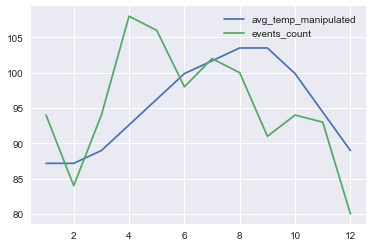

 
         Iowa     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -0.556            42             -1.573540
1           2     2.222            38              6.288501
2           3     9.444            33             26.727545
3           4    16.667            38             47.169419
4           5    22.222            35             62.890672
5           6    27.778            39             78.614755
6           7    30.000            58             84.903256
7           8    28.889            73             81.759005
8           9    24.444            39             69.179173
9          10    17.222            46             48.740129
10         11     8.889            45             25.156835
11         12     1.111            47              3.144251


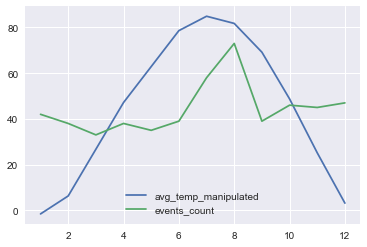

 
         Idaho     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     3.333             7              1.989285
1           2     7.222            12              4.310416
2           3    12.778            14              7.626489
3           4    16.667            15              9.947620
4           5    22.222             8             13.263095
5           6    27.222            11             16.247321
6           7    32.778             7             19.563393
7           8    32.222            10             19.231548
8           9    26.111            11             15.584226
9          10    18.333            12             10.941964
10         11     8.889             7              5.305357
11         12     3.333            12              1.989285


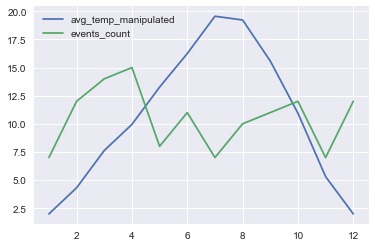

 
         Illinois     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     0.000          1736              0.000000
1           2     2.222          1468            279.838208
2           3     7.778          1730            979.559669
3           4    15.000          1878           1889.096816
4           5    21.111          1996           2658.714859
5           6    27.222          2261           3428.332902
6           7    28.889          2320           3638.274528
7           8    27.778          2296           3498.355424
8           9    23.889          2014           3008.575589
9          10    17.222          1886           2168.935024
10         11     8.889          1705           1119.478773
11         12     2.222          1659            279.838208


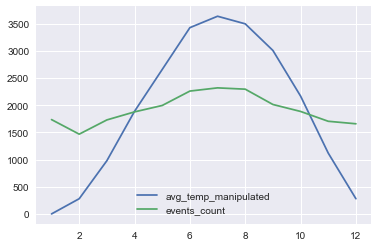

 
         Indiana     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     1.667           721             69.504395
1           2     4.444           575            185.289462
2           3    10.556           700            440.125013
3           4    17.222           652            718.059206
4           5    22.778           683            949.712727
5           6    27.778           702           1158.184219
6           7    29.444           742           1227.646920
7           8    28.333           721           1181.324554
8           9    25.000           711           1042.357458
9          10    18.333           702            764.381571
10         11    11.111           692            463.265349
11         12     3.889           761            162.149126


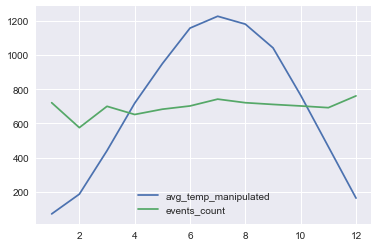

 
         Kansas     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     4.444           136             31.840047
1           2     7.222           103             51.743658
2           3    13.333           139             95.527304
3           4    19.444           123            139.310951
4           5    24.444           126            175.134586
5           6    29.444           181            210.958220
6           7    31.667           131            226.885408
7           8    31.667           141            226.885408
8           9    26.667           171            191.061774
9          10    20.000           110            143.294539
10         11    12.778           111             91.550881
11         12     5.556           152             39.807223


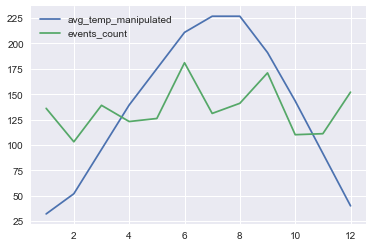

 
         Kentucky     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     4.444           199             56.054460
1           2     7.222           164             91.094804
2           3    12.778           221            161.175493
3           4    18.889           219            238.256682
4           5    23.889           243            301.324257
5           6    28.333           219            357.378717
6           7    30.556           227            385.418560
7           8    30.000           242            378.405446
8           9    26.111           223            329.351487
9          10    20.000           221            252.270297
10         11    12.778           199            161.175493
11         12     6.667           419             84.094304


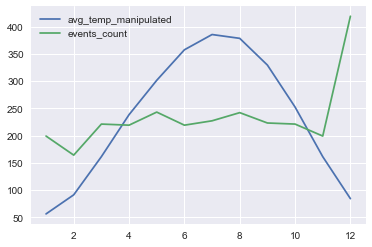

 
         Louisiana     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    16.667          1344            901.372804
1           2    18.333          1304            991.472227
2           3    22.222          1426           1201.794351
3           4    25.556          1344           1382.101360
4           5    29.444          1391           1592.369403
5           6    31.667          1440           1712.592103
6           7    32.778          1499           1772.676412
7           8    32.778          1444           1772.676412
8           9    30.556          1334           1652.507793
9          10    26.667          1351           1442.185670
10         11    22.222          1322           1201.794351
11         12    17.778          1386            961.457113


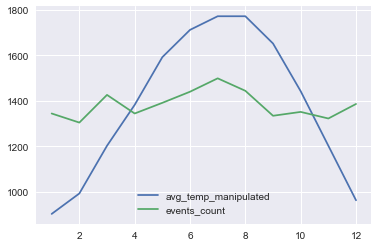

 
         Massachusetts     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     2.222           330             51.982529
1           2     3.889           316             90.981122
2           3     7.222           352            168.954915
3           4    13.333           300            311.918567
4           5    18.889           391            441.898283
5           6    24.444           374            571.854604
6           7    27.222           408            636.844462
7           8    26.667           396            623.860528
8           9    22.222           343            519.872076
9          10    16.111           354            376.908425
10         11    10.556           292            246.952103
11         12     5.000           303            116.972387


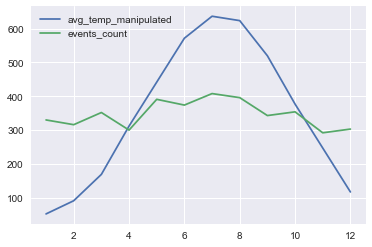

 
         Maryland     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     5.556          1339            375.868386
1           2     7.778          1078            526.188680
2           3    12.222          1176            826.829268
3           4    18.333          1238           1240.243901
4           5    23.889          1288           1616.112287
5           6    29.444          1272           1991.913022
6           7    31.667          1355           2142.300967
7           8    30.556          1390           2067.140820
8           9    26.667          1319           1804.046480
9          10    20.000          1345           1353.017947
10         11    14.444          1298            977.149562
11         12     7.778          1349            526.188680


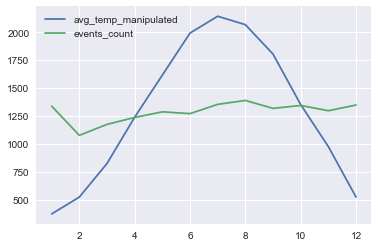

 
         Michigan     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -1.111          1913           -150.667259
1           2     0.556          1576             75.401436
2           3     6.667          1782            904.139167
3           4    14.444          1786           1958.809978
4           5    20.556          1886           2787.683322
5           6    25.556          1884           3465.753794
6           7    27.778          2215           3767.088311
7           8    26.667          2098           3616.421053
8           9    22.778          2036           3089.017840
9          10    15.556          1902           2109.612851
10         11     8.333          1820           1130.072248
11         12     1.111          2006            150.667259


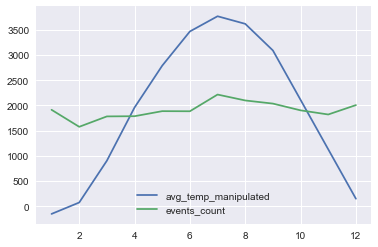

 
         Minnesota     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -3.333           160            -44.964964
1           2    -0.556           132             -7.500906
2           3     6.111           182             82.442513
3           4    14.444           158            194.861669
4           5    21.667           165            292.305994
5           6    26.667           187            359.760185
6           7    29.444           220            397.224243
7           8    27.778           223            374.748507
8           9    22.778           200            307.294315
9          10    15.000           181            202.362575
10         11     5.556           164             74.955098
11         12    -1.667           239            -22.489227


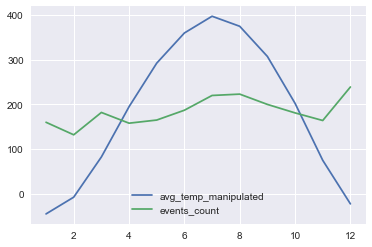

 
         Missouri     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     4.444           784            215.290299
1           2     7.222           740            349.870958
2           3    13.333           883            645.919341
3           4    19.444           850            941.967724
4           5    23.889           890           1157.306468
5           6    28.333           927           1372.596766
6           7    31.111           954           1507.177425
7           8    31.111          1069           1507.177425
8           9    26.667           999           1291.887127
9          10    20.556           926            995.838744
10         11    13.333           923            645.919341
11         12     6.111           982            296.048383


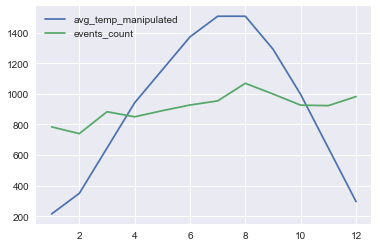

 
         Mississippi     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    13.333           278            159.858624
1           2    15.556           260            186.511719
2           3    20.556           276            246.460202
3           4    24.444           272            293.076142
4           5    28.333           307            339.704071
5           6    31.667           278            379.677720
6           7    33.333           326            399.652554
7           8    33.333           298            399.652554
8           9    30.556           279            366.357167
9          10    25.000           267            299.742413
10         11    19.444           297            233.127659
11         12    14.444           339            173.179176


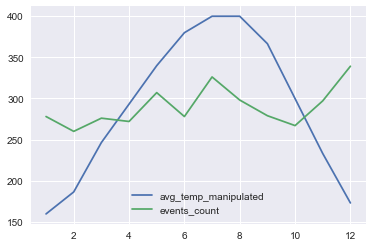

 
         Nebraska     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     0.000            63              0.000000
1           2     2.778            44             10.382169
2           3    10.000            54             37.372818
3           4    17.222            52             64.363467
4           5    22.778            52             85.127805
5           6    28.889            62            107.966334
6           7    31.111            68            116.270574
7           8    30.000            80            112.118454
8           9    25.000            85             93.432045
9          10    17.778            68             66.441396
10         11     8.889            45             33.220698
11         12     2.222            62              8.304240


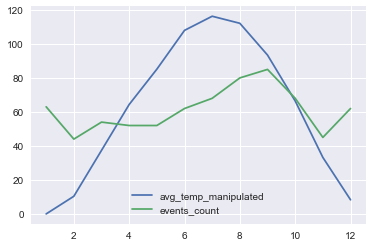

 
         North Carolina     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    10.556          1202            585.189509
1           2    12.778          1019            708.369794
2           3    17.222          1148            954.730364
3           4    22.222          1190           1231.913724
4           5    26.111          1162           1447.506941
5           6    30.000          1263           1663.100158
6           7    31.667          1326           1755.513091
7           8    30.556          1333           1693.922948
8           9    27.222          1150           1509.097084
9          10    22.222          1190           1231.913724
10         11    16.667          1202            923.963011
11         12    11.667          1167            646.779652


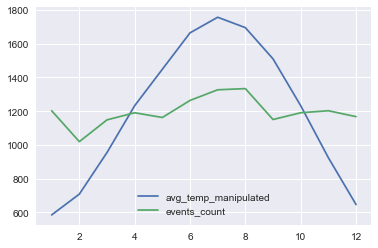

 
         New Hampshire     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -0.556             6             -0.330359
1           2     1.667            10              0.990482
2           3     6.667             8              3.961332
3           4    13.889             6              8.252429
4           5    20.556             7             12.213761
5           6    25.000             9             14.854254
6           7    27.778            14             16.504858
7           8    27.222             9             16.174500
8           9    22.778             3             13.534008
9          10    15.556            15              9.242911
10         11     8.889             8              5.281578
11         12     2.222             7              1.320246


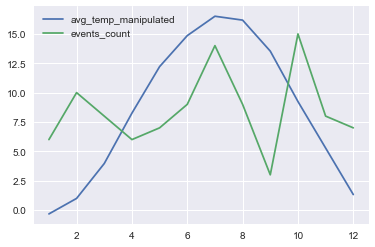

 
         New Jersey     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     3.889           752            179.782365
1           2     5.556           646            256.845158
2           3    10.556           796            487.987309
3           4    16.667           767            770.489246
4           5    22.222           802           1027.288175
5           6    27.778           779           1284.133333
6           7    30.000           912           1386.852905
7           8    28.889           894           1335.493119
8           9    25.000           771           1155.710754
9          10    18.333           818            847.505810
10         11    12.778           811            590.706881
11         12     6.667           883            308.204944


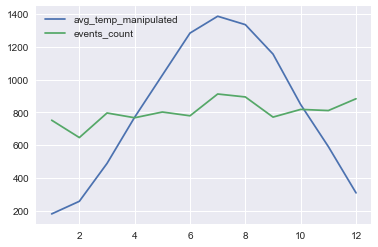

 
         New Mexico     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     6.667           267             95.277924
1           2     8.889           266            127.032468
2           3    13.333           240            190.541557
3           4    18.333           281            261.996427
4           5    23.333           272            333.451298
5           6    28.333           280            404.906168
6           7    30.000           305            428.729221
7           8    28.333           302            404.906168
8           9    25.556           225            365.220133
9          10    19.444           225            277.873699
10         11    11.667           224            166.732794
11         12     6.111           257             87.332142


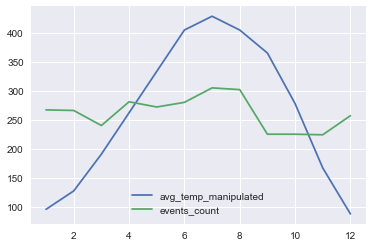

 
         Nevada     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     7.222           412            164.279742
1           2    10.000           389            227.471257
2           3    13.889           402            315.934829
3           4    17.222           410            391.750999
4           5    21.667           444            492.861973
5           6    27.222           463            619.222257
6           7    32.222           458            732.957885
7           8    31.111           459            707.685828
8           9    26.667           443            606.597602
9          10    20.000           432            454.942515
10         11    12.222           414            278.015371
11         12     7.222           430            164.279742


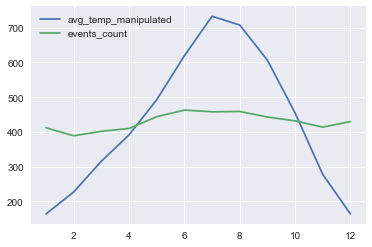

 
         New York     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     3.889          3836            873.679768
1           2     5.556          3386           1248.178141
2           3    10.000          3787           2246.540930
3           4    15.556          3674           3494.719071
4           5    21.667          3896           4867.580234
5           6    26.111          3999           5865.943023
6           7    29.444          4464           6614.715115
7           8    28.333          4268           6365.124418
8           9    24.444          3981           5491.444650
9          10    18.333          3942           4118.583487
10         11    12.222          3329           2745.722325
11         12     6.667          2868           1497.768838


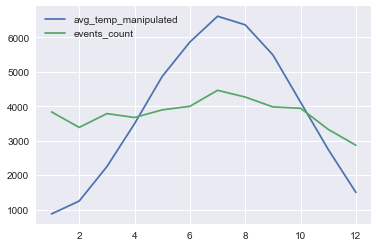

 
         Ohio     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     2.222          1223            165.427163
1           2     4.444          1073            330.854327
2           3    11.111          1208            827.210267
3           4    17.222          1237           1282.172191
4           5    22.778          1259           1695.814550
5           6    27.778          1280           2068.062892
6           7    29.444          1407           2192.096040
7           8    28.889          1355           2150.776474
8           9    25.000          1283           1861.241713
9          10    18.333          1335           1364.885773
10         11    11.111          1220            827.210267
11         12     5.000          1258            372.248343


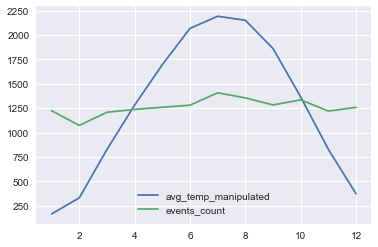

 
         Oklahoma     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    10.000           406            178.954208
1           2    12.778           345            228.667687
2           3    17.222           368            308.194938
3           4    22.222           511            397.672042
4           5    26.667           391            477.217187
5           6    31.111           388            556.744438
6           7    34.444           421            616.389875
7           8    33.889           421            606.457917
8           9    29.444           421            526.912771
9          10    22.778           385            407.621896
10         11    16.667           366            298.262979
11         12    10.556           369            188.904062


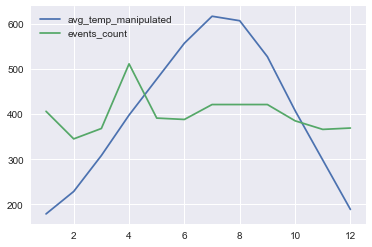

 
         Oregon     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     8.889           141             77.045655
1           2    11.111           132             96.304902
2           3    13.333           154            115.564149
3           4    16.111           123            139.642542
4           5    20.000           176            173.350558
5           6    23.333           157            202.239428
6           7    27.778           147            240.766589
7           8    27.778           175            240.766589
8           9    25.000           148            216.688197
9          10    17.778           139            154.091311
10         11    11.667           163            101.124048
11         12     7.778           170             67.416032


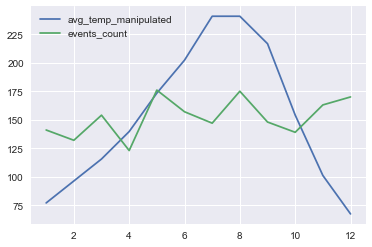

 
         Pennsylvania     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     4.444          1483            359.108225
1           2     6.667          1274            538.743146
2           3    11.667          1441            942.780303
3           4    17.778          1361           1436.594516
4           5    23.333          1383           1885.479798
5           6    28.333          1437           2289.516955
6           7    30.556          1555           2469.151876
7           8    29.444          1645           2379.294012
8           9    25.556          1537           2065.114718
9          10    19.444          1491           1571.219697
10         11    13.333          1418           1077.405484
11         12     7.222          1573            583.591270


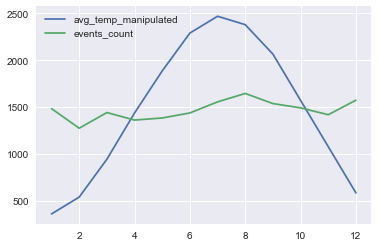

 
         South Carolina     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    13.333           745            382.146791
1           2    15.556           605            445.861808
2           3    20.000           666            573.234517
3           4    24.444           640            700.607227
4           5    28.889           716            828.008599
5           6    32.222           691            923.538131
6           7    33.889           708            971.317228
7           8    32.778           703            939.474050
8           9    29.444           721            843.915856
9          10    24.444           687            700.607227
10         11    19.444           696            557.298598
11         12    14.444           702            413.989968


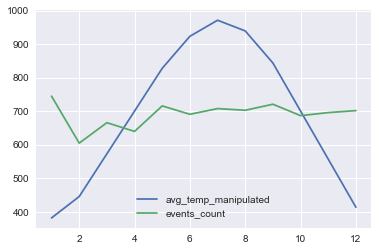

 
         Tennessee     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    10.000           828            392.103740
1           2    12.778           687            501.030158
2           3    17.778           849            697.082028
3           4    22.778           847            893.133898
4           5    27.222           871           1067.384800
5           6    31.667           885           1241.674912
6           7    33.333           998           1306.999395
7           8    32.778           941           1285.237638
8           9    29.444           910           1154.510251
9          10    23.333           855            914.895655
10         11    17.222           831            675.281060
11         12    11.111          1063            435.666465


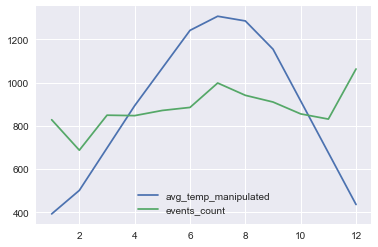

 
         Texas     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    16.667          3842           2550.198912
1           2    18.333          3569           2805.111697
2           3    22.222          3993           3400.163210
3           4    26.667          3934           4080.287657
4           5    30.556          4095           4675.339170
5           6    33.333          4149           5100.244815
6           7    35.556          4515           5440.383543
7           8    36.111          4570           5525.303468
8           9    32.778          4217           5015.324889
9          10    27.778          4045           4250.280517
10         11    21.667          3696           3315.243285
11         12    17.222          4168           2635.118837


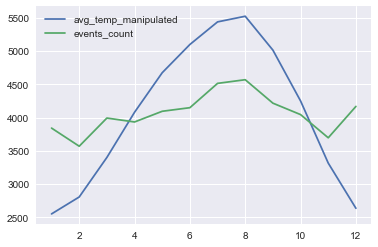

 
         Utah     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     3.333            91             17.441180
1           2     6.667            69             34.887593
2           3    11.667            85             61.051980
3           4    16.111            99             84.306887
4           5    21.667           102            113.380754
5           6    27.778            77            145.358867
6           7    32.222           113            168.613774
7           8    31.667           101            165.709528
8           9    25.556            96            133.731414
9          10    18.333            96             95.934341
10         11    10.000            84             52.328774
11         12     4.444            83             23.254907


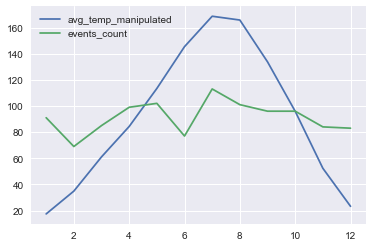

 
         Virginia     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     8.333           922            362.650709
1           2    10.556           776            459.395282
2           3    15.556           879            676.994412
3           4    21.111           906            918.747045
4           5    25.556           909           1112.192671
5           6    30.000           897           1305.594778
6           7    32.222           960           1402.295831
7           8    31.111           926           1353.945304
8           9    27.222           932           1184.696701
9          10    21.667           919            942.944068
10         11    16.111           895            701.147915
11         12    10.556           959            459.395282


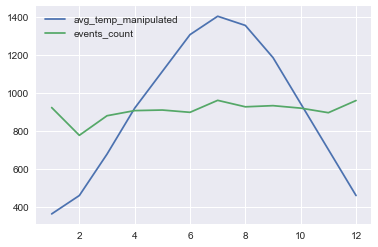

 
         Vermont     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -2.778             4             -1.942620
1           2    -0.556             7             -0.388804
2           3     4.444             6              3.107632
3           4    12.778             9              8.935491
4           5    19.444             9             13.596939
5           6    24.444             6             17.093374
6           7    27.222             5             19.035994
7           8    26.111            12             18.259086
8           9    21.111             9             14.762650
9          10    13.889            12              9.712399
10         11     7.778            12              5.439055
11         12     0.556            17              0.388804


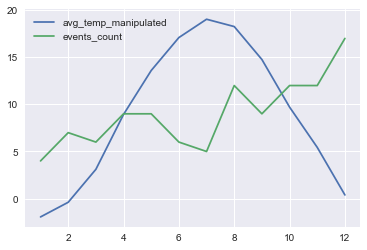

 
         Washington     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     8.333           426            221.771584
1           2    10.000           389            266.136547
2           3    12.222           436            325.272087
3           4    14.444           408            384.407628
4           5    18.333           407            487.908131
5           6    21.111           415            561.840863
6           7    24.444           456            650.544174
7           8    24.444           459            650.544174
8           9    21.667           395            576.638055
9          10    15.556           395            414.002012
10         11    10.556           404            280.933739
11         12     7.778           437            207.001006


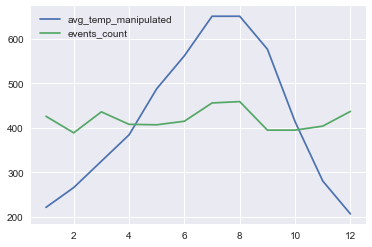

 
         Wisconsin     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1    -1.667           312            -44.175559
1           2     0.556           297             14.734020
2           3     5.556           274            147.234196
3           4    12.222           319            323.883431
4           5    18.333           360            485.825146
5           6    23.889           324            633.059342
6           7    26.667           447            706.676440
7           8    25.556           401            677.234900
8           9    21.667           360            574.176263
9          10    15.000           352            397.500528
10         11     7.778           367            206.117274
11         12     0.556           324             14.734020


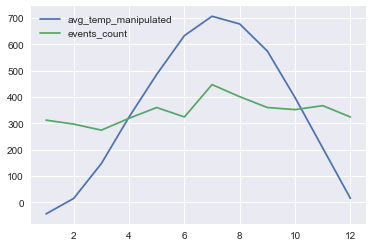

 
         West Virginia     
   
    month_int  avg_temp  events_count  avg_temp_manipulated
0           1     5.556            45             16.337900
1           2     8.333            61             24.503910
2           3    13.333            52             39.206844
3           4    20.000            34             58.811736
4           5    23.889            59             70.247678
5           6    27.778            54             81.683620
6           7    29.444            74             86.582637
7           8    28.889            64             84.950612
8           9    25.556            42             75.149636
9          10    20.000            56             58.811736
10         11    13.889            61             40.841810
11         12     7.778            58             22.871884


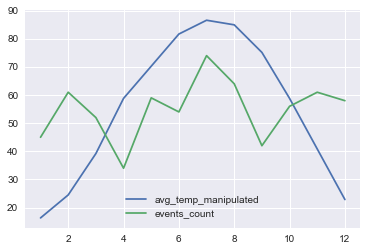

In [829]:
states = data[data['state'] != 'Rhodes Island']['state'].drop_duplicates()
# states = data['state'].drop_duplicates()

for i in states:   
    events =  pd.DataFrame()
    st_data = pd.DataFrame()
    st_data[['month_int','avg_temp']] = month_dem[['month_int',i ]]
    events = data[data['state'] == i ][['month_int','month']].groupby('month_int', sort=False)["month"].count().reset_index(name ='events_count')
    result = pd.merge(st_data,events,how='left',on=['month_int'])
    result['avg_temp_manipulated'] = result['avg_temp'] * (result['events_count'].mean() / result['avg_temp'].mean())
    print("\033[1;31;20m \n         {}     ".format(i))
    print("\033[0;30;48m   ")
    print(result)
    
    line_up, = plt.plot(result['month_int'],result['avg_temp_manipulated'], label='Line 2')
    line_down, = plt.plot(result['month_int'],result['events_count'], label='Line 1')
    plt.legend([line_up, line_down], ['avg_temp_manipulated', 'events_count'])

#     print(i)
    plt.show()